**Inferential Statistics** drawing conclusions and/or making decisions concerning a population based only on sample data.

For inferential Statistics we make statements about the population by examining sample results.

Estimation - e.g estimate the population mean using the sample mean

Hypothesis Testing - we use sample evidence to test the claim of population values. 

A population is the set of all items or individuals of interest

A sample is a subset of the population, we sample because it is less time consuming than a census, less costly to administer and it is possible to obtain high precision sample statistic results.


## Point estimates

Point estimates are estimates of population parameters based on sample data. The average of a sample is known as the sample mean. the sample mean is usually not exactly the same as the population mean.

Let investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [88]:
np.random.seed(10)

population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

np.float64(43.002372)

This is the true Population mean.

In [89]:
np.random.seed(6)

sample_ages = np.random.choice(a = population_ages, size = 500) # sample 500 values

print(sample_ages.mean())

population_ages.mean() - sample_ages.mean()

42.388


np.float64(0.614372000000003)

Our point estimate based on a sample of 500 individuals underestimates the true population of the mean by 0.6 years. This illustrates an important point that we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population belonging to a subcategory/ having some characteristic. The sample poportion provides an estimate of P.

We can make a point estimate of this proportion by taking a sample and then checking the ratio in the sample.

$$\hat p = \frac{number\ of\ items\ in\ sample\ having\ characteristic}{sample\ size}$$

$\hat p$ has a binomial distribution but can be apporximated by a normal distribution when np(1-P) > 5

Lets take for example we would like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base.

In [90]:
import random
random.seed(10)

population_races = (["white"] *100000) + (["black"] *50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)

demo_sample = random.sample(population_races, 1000) # use random as want count method

print(len(population_races))
for race in set(population_races):
    print(f"{race} 'true population proportion:' {population_races.count(race)/len(population_races)}")
    print('='*55)

for race in set(demo_sample): #note set removes duplicates and gives a unique list of races
    print( race + " proportion estimate:")
    print(demo_sample.count(race)/1000)
    print('='*55)



250000
other 'true population proportion:' 0.1
hispanic 'true population proportion:' 0.2
black 'true population proportion:' 0.2
white 'true population proportion:' 0.4
asian 'true population proportion:' 0.1
other proportion estimate:
0.099
hispanic proportion estimate:
0.192
black proportion estimate:
0.231
white proportion estimate:
0.379
asian proportion estimate:
0.099


The estimates as we can see are close to the true underlying population proportions.

## Sampling Distributions and The Central Limit Theorem

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties, like symmetry and having the majority of data clustered within a few SD of the mean. However often real world data is not normally distributed and since the distribution of the sample tends to mirror the distribution of the population, this means the sample taken from a population with a skewed distribution will also tend to be skewed.

**The Central Limit Theorem** is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as the sampling distribution, will be normally distributed. As long as the sample size is large enough. 

This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

To illustrate this lets create a sampling distribution by taking 200 samples from out population and then making 200 point estimates of the mean.

[np.float64(42.378), np.float64(42.668), np.float64(42.938), np.float64(43.178), np.float64(43.374)]


<Axes: ylabel='Density'>

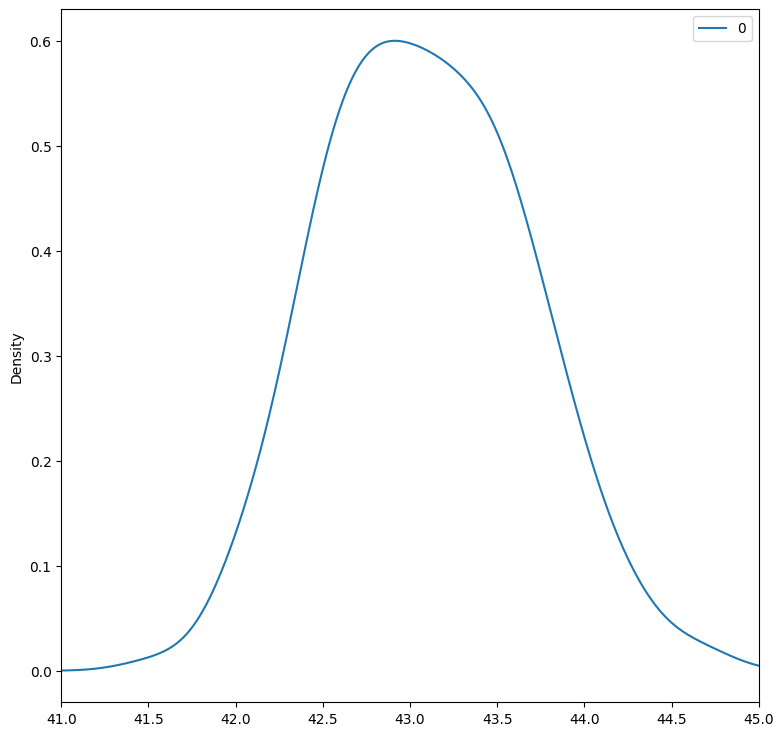

In [91]:
np.random.seed(10)

point_estimates = []

for x in range(200):
    sample = np.random.choice(a = population_ages, size = 500)
    point_estimates.append(sample.mean())

print(point_estimates[0:5])

pd.DataFrame(point_estimates).plot(kind = 'density', figsize = (9,9), xlim = (41,45))

The sampling distribution appears to be roughly normal, despite the bimodal population distribution, two mode, that the samples were drawn from.

In addition the mean of the sampling distribution approaches the true population mean.

In [92]:
print(population_ages.mean() - np.array(point_estimates).mean()) # lists lack a built in mean method, numpy arrays have a mean method

#or

print(sum(population_ages)/len(population_ages) - (sum(point_estimates)/ len(point_estimates)))

# n.b difference is due to floating point precision numpy is optimized and can use higher precision.

-0.08440799999999626
-0.08440799999998205


note the more samples we take the better our estimate of the population parameter is likely to be.

To extend the Central limit theorem looking at the normal probability plot of the point estimates, in order to access normality

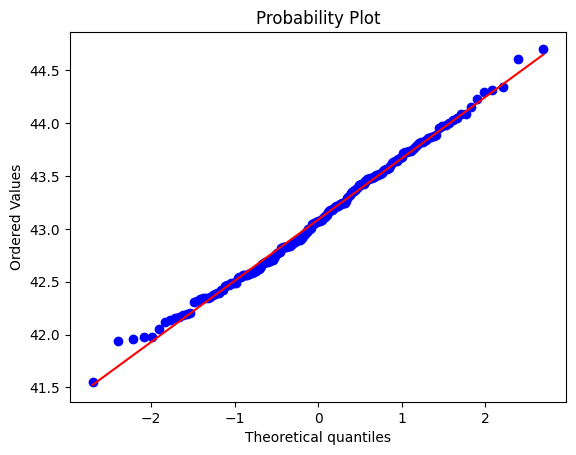

In [93]:
fig = plt.figure()
stats.probplot(x = point_estimates, dist='norm', plot = plt)
plt.show()

As we can see the near line behaviour suggest that point estimates are approximately normally distributed. Supporting the Central Limit Theorem.

Note we can obtain a sampling distribution using vectorized Operations, leveraging Numpy's ability to handle large arrays directly.

Why is this more efficient:

1) Memory Efficiency: Instead of creating a list and appending to it, we generate a single 2D array of shape to store all the samples at once. Minimizes the overhead of appending values to a list.
2) Numpy's vectorized operations such as  samples.mean(axis=1) calculates the mean of each row(sample) in one step rather than looping though each sample individually.

In [94]:
np.random.seed(10)
samples_v = np.random.choice(a = population_ages, size = (200, 500), replace = True)
print(samples_v[0:5])
point_estimates_vector = samples_v.mean(axis = 1) # axis = 1 computes the mean for each row
print(point_estimates_vector[0:5])



[[48 28 56 ... 62 48 40]
 [54 28 55 ... 66 30 53]
 [56 23 38 ... 58 44 51]
 [56 56 57 ... 57 29 26]
 [62 46 53 ... 27 34 60]]
[42.378 42.668 42.938 43.178 43.374]

















A 'sampling distribution' is a probability distribution of all the possible values of a statistic for a given size sample selected from a population.

**Standard Error of the Mean** 
Different Samples of the same size from the same population will yield different sample means.

A measure of the variability in mean from sample to sample is given by the Standard Error of the Mean: which is the standard deviation of the mean values over root n. $$ \sigma_ {\hat x} = \frac{\sigma_x}{\sqrt n} $$

n.b as sample size increases the standard error of the mean decreases. 

## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to improve estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you set your confidence level to 95%.

Higher Confidence levels result in a wider confidence interval.

A confidence interval provides additional information about variability. The interval takes into consideration variation in sample statistics from sample to sample. 

We calculate a confidence interval by taking a point estimate and then adding or subtracting a **Margin of Error** to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample.

The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

If you know the standard deviation of the population the margin of error is equal to: $$ ME = Z_\frac{\alpha}{2} * \frac{\sigma}{\sqrt n} $$

where $\sigma$ is the population standard deviation, n is the sample size, and z is a number known as the z critical value.

The Z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. Since we know that roughly 95% of data in a normal distribution lies within 2 std of the mean , we can use 2 as the z-critical value for a 95% confidence interval.

Lets calculate a 95% confidence for our mean point.

In [95]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a = population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975) # distribution has two tails we want 95% of data included so use q = 0.975 to get value at each tail

print(f"z-critical value : {z_critical}")

pop_stdev = population_ages.std()

margin_of_error = z_critical * (pop_stdev/ np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean +margin_of_error)

print(f"Confidence interval: {confidence_interval}")

z-critical value : 1.959963984540054
Confidence interval: (np.float64(41.70306406882683), np.float64(43.34293593117317))


The confidence interval we calculated captures the true population mean which was 4.0023

We say we are 95% confident that the population mean is between 41.7 and 43.342

Creating several confidence intervals and plotting them shows what captured implies.

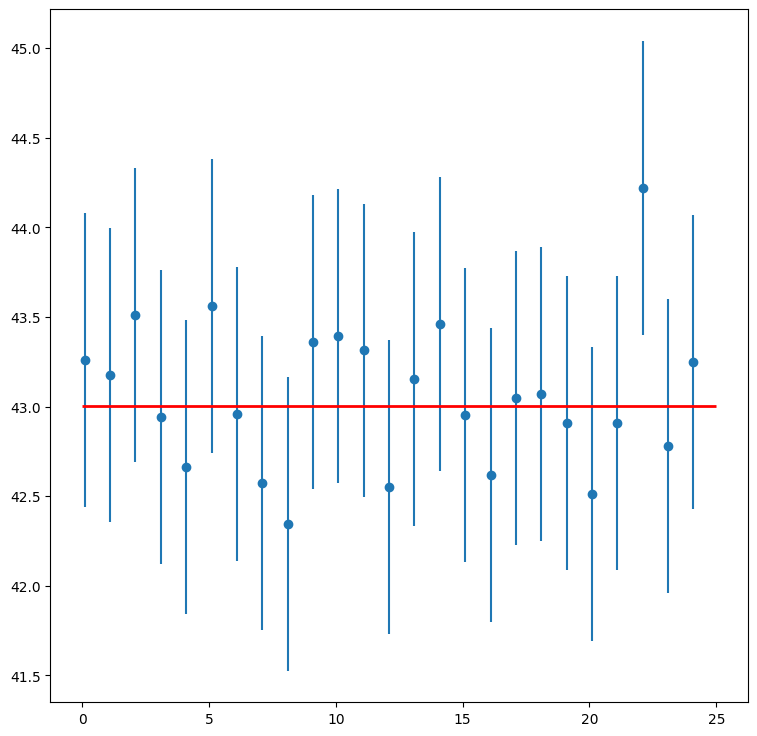

In [96]:
import math
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):

    sample = np.random.choice(a = population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)

    pop_stdev = population_ages.std()

    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)
    
    intervals.append(confidence_interval)

plt.figure(figsize= (9,9))

plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means, 
             yerr=[(top-bot) / 2 for bot,top in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected as a 95% confidence interval captures the true mean 95% of the time we'd expect our interval to miss the true mean 5% of the time.

## If we do not know the Population standard deviation.

We have to use the sample standard deviation when creating the confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have error when you don't know the population standard deviation.

To account for this error, we use what's known as a t-critical value instead of the z-critical value from the Student's T-distribution. A distribution which closely resembles the normal distribution but that gets wider and wider as the sample size falls.

Let's take a new, smaller sample and then create a confidence interval using the t-distribution.



In [97]:
np.random.seed(10)

sample_size = 25 
sample = np.random.choice(a = population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df = 24)  # degrees of freedom are the number of observations that are free to vary after sample mean has been calculated

print(f"t critical value : {t_critical}")

sample_stdev = sample.std(ddof = 1) # n-1 for sample

margin_of_error = t_critical* (sample_stdev/ math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Confidence interval: {confidence_interval}")

t critical value : 2.0638985616280205
Confidence interval: (np.float64(37.65147508161371), np.float64(48.108524918386294))


When using the t-distribution since the t is a family of distributions dependent on the degrees of freed. We have to specify this. As sample size becomes large the t-distribution approaches the normal distribution.

The tcritical value is larger than the z-critical value we used for 95% confidence interval. This alllows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation,since s is variable from sample to sample. in place of the population standard deviation. The end result is a much wider confidence interval/ interval with a larger margin of error.

If we have a large sample, the t-critical value will approach the z-critical value so there is little difference between using the normal distribution vs the t-distribution:

In [98]:
stats.t.ppf(q = 0.975, df = 999) - stats.norm.ppf(0.975)

np.float64(0.0023774765933946007)

In [99]:
# stats has a confidence interval function
sigma = sample_stdev/ math.sqrt(sample_size)

stats.t.interval(confidence= 0.95,             # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)     

(np.float64(37.65147508161371), np.float64(48.108524918386294))

We can also make a confidence interval for a point estimate of the population proportion.

in this case the Margin of error = $$ z^* \sqrt{\frac{p(1-p)}{n}}$$